In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\nirma\Downloads\advertising (4).csv")

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
import seaborn as sns

C:\Users\nirma\AppData\Local\Temp\ipykernel_16352\3780260955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["radio"])
c:\Users\nirma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='radio', ylabel='Density'>

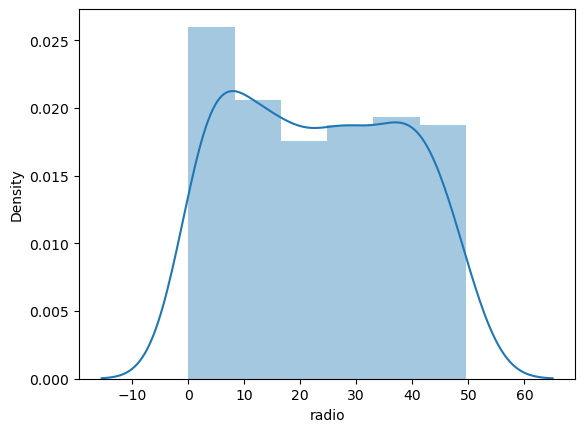

In [7]:
sns.distplot(df["radio"])

In [8]:
df.duplicated().sum()

0

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [10]:
import sklearn

In [11]:
x = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
x_train.shape

(160, 3)

In [15]:
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [16]:
from  sklearn.metrics  import   mean_squared_error,mean_absolute_error,r2_score

In [17]:
rmse_val=[]
for K in range(1,20):
     K = K+1
     model=KNeighborsRegressor(n_neighbors=K)
     model.fit(x_train,y_train)
     pred=model.predict(x_test)
     error=np.sqrt(mean_squared_error(y_test,pred))
     rmse_val.append(error)
     print('RMSE value for K= ',K ,'is:',error)

RMSE value for K=  2 is: 1.4128428787377596
RMSE value for K=  3 is: 1.5471838215861027
RMSE value for K=  4 is: 1.470087157280139
RMSE value for K=  5 is: 1.4857422387480272
RMSE value for K=  6 is: 1.4301345119331337
RMSE value for K=  7 is: 1.453045710476685
RMSE value for K=  8 is: 1.4078893222657807
RMSE value for K=  9 is: 1.5171102322475192
RMSE value for K=  10 is: 1.653500831569189
RMSE value for K=  11 is: 1.7756723787608495
RMSE value for K=  12 is: 1.8015280936533355
RMSE value for K=  13 is: 1.8080981541142176
RMSE value for K=  14 is: 1.880039486124628
RMSE value for K=  15 is: 1.9137014744555467
RMSE value for K=  16 is: 1.9621984242807864
RMSE value for K=  17 is: 1.9300415937573001
RMSE value for K=  18 is: 1.9560676412854314
RMSE value for K=  19 is: 1.969067934799598
RMSE value for K=  20 is: 1.9838148225073828


In [18]:
model.fit(x_train,y_train)
pred= model.predict(x_test)
error=np.sqrt(mean_squared_error(y_test,pred))
rmse_val.append(error)
print('RMSE value for K = ', K, 'is:',error)

RMSE value for K =  20 is: 1.9838148225073828


In [19]:
mse=mean_squared_error(y_test,pred)
mse


3.9355212499999985

In [20]:
mae = mean_absolute_error(y_test,pred)
mae

1.4512499999999995

In [21]:
r2=r2_score(y_test,pred)
r2

0.8753145386050979

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rfr=RandomForestRegressor()

In [24]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [25]:
y_pred=rfr.predict(x_test)

In [29]:
mse=mean_squared_error(y_test,y_pred)
mse

0.4585644250000027

In [30]:
mae=mean_squared_error(y_test,y_pred)
mae

0.4585644250000027

In [31]:
r2=r2_score(y_test,y_pred)
r2

0.9854717295935288

In [32]:
import pickle

In [33]:
with open('rfr.pkl','wb') as file:
     pickle.dump(rfr,file)